# Eficiencia De Operadores

1. [Objetivo](#Objetivo)
2. [Preprocesamiento De Datos](#Preprocesamiento-De-Datos)
3. [Analisis Exploratorio de Datos](#Analisis-Exploratorio-de-Datos)
4. [Identificación de Operadores Ineficaces](#Identificación-de-Operadores-Ineficaces)
5. [Pruebas de Hipótesis](#Pruebas-de-Hipótesis)
6. [Resultados y Conclusiones](#Resultados-y-Conclusiones)


## Objetivo

Se busca identificar los comportamientos que pueden ser sinonimo de un operador ineficiente y asi poderlos clasificar y reconocer cuales son sus caracteristicas en cuanto al desempeño de sus funbciones.

## Preprocesamiento De Datos

### Librerias

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime

### Carga de datasets

In [4]:
df_calls = pd.read_csv('/datasets/telecom_dataset_us.csv')
df_clients = pd.read_csv('/datasets/telecom_clients_us.csv')

### Verificacion de datos

In [5]:
print(df_calls.info()) #revision de tipo de datos en cada variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
None


In [6]:
df_calls["date"] = pd.to_datetime(df_calls["date"]).dt.date # Se cambia el tipo de dato de "date" para que se fecha y no muestre la hora
print(df_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
None


In [7]:
df_calls

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04,in,False,NaN,True,2,0,4
1,166377,2019-08-05,out,True,880022.0,True,3,0,5
2,166377,2019-08-05,out,True,880020.0,True,1,0,1
3,166377,2019-08-05,out,True,880020.0,False,1,10,18
4,166377,2019-08-05,out,False,880022.0,True,3,0,25
...,...,...,...,...,...,...,...,...,...
53897,168606,2019-11-10,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11,out,True,957922.0,False,2,479,501
53899,168606,2019-11-15,out,True,957922.0,False,4,3130,3190
53900,168606,2019-11-15,out,True,957922.0,False,4,3130,3190


In [8]:
print(df_calls.isnull().sum()) 

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64


Se tienen con valores nulos los indicadores de llamadas internas e id de operador, pero no hay mallor problema con estos datos, al filtrar los datos por operedor se revisa de nuevo 

In [9]:
df_calls["operator_id"] = df_calls["operator_id"].fillna(0).astype(int) # Se cambia el tipo de dato del id del operador de flotante a entero
print(df_calls.isnull().sum()) 

user_id                  0
date                     0
direction                0
internal               117
operator_id              0
is_missed_call           0
calls_count              0
call_duration            0
total_call_duration      0
dtype: int64


In [10]:
print(df_calls.duplicated().sum())

4900


In [11]:
print(df_calls[df_calls.duplicated()])

       user_id        date direction internal  operator_id  is_missed_call  \
8       166377  2019-08-05       out    False       880020            True   
28      166377  2019-08-12        in    False            0            True   
44      166377  2019-08-14       out    False       880026           False   
45      166377  2019-08-14        in    False            0            True   
51      166377  2019-08-15       out    False       880026           False   
...        ...         ...       ...      ...          ...             ...   
53869   168601  2019-11-25        in    False       952914           False   
53874   168601  2019-11-26        in    False       952914           False   
53875   168601  2019-11-26        in    False            0            True   
53885   168603  2019-11-20       out    False       959118            True   
53900   168606  2019-11-15       out     True       957922           False   

       calls_count  call_duration  total_call_duration  
8     

Los registros no son duplicados exactos, por lo cual no afectan a los datos.

In [12]:
print(df_clients.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
None


In [13]:
df_clients["date_start"] = pd.to_datetime(df_clients["date_start"]).dt.date # Se cambia el tipo de dato de "date_start" para que se fecha y no muestre la hora, por si se tiene que utilizar mas adelante en el analisis


In [14]:
print(df_clients.isnull().sum())

user_id        0
tariff_plan    0
date_start     0
dtype: int64


In [15]:
print(df_clients.duplicated().sum())

0


No se encuentra mayo complicacion con los datos y sus tipos de variables, se p´rosede a prepararlos para su majeno

### Unir tablas

In [16]:
df = df_calls.merge(df_clients, on='user_id', how='left') # Se unin ambas tablas por medio del ID del cliente
df

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-04,in,False,0,True,2,0,4,B,2019-08-01
1,166377,2019-08-05,out,True,880022,True,3,0,5,B,2019-08-01
2,166377,2019-08-05,out,True,880020,True,1,0,1,B,2019-08-01
3,166377,2019-08-05,out,True,880020,False,1,10,18,B,2019-08-01
4,166377,2019-08-05,out,False,880022,True,3,0,25,B,2019-08-01
...,...,...,...,...,...,...,...,...,...,...,...
53897,168606,2019-11-10,out,True,957922,True,1,0,38,C,2019-10-31
53898,168606,2019-11-11,out,True,957922,False,2,479,501,C,2019-10-31
53899,168606,2019-11-15,out,True,957922,False,4,3130,3190,C,2019-10-31
53900,168606,2019-11-15,out,True,957922,False,4,3130,3190,C,2019-10-31


In [17]:
df_operator = df[df["operator_id"]>0] # Se extraen aquellas llamadas que unicamente hayan pasado por un operador ya sean entrada o salida
df_operator

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
1,166377,2019-08-05,out,True,880022,True,3,0,5,B,2019-08-01
2,166377,2019-08-05,out,True,880020,True,1,0,1,B,2019-08-01
3,166377,2019-08-05,out,True,880020,False,1,10,18,B,2019-08-01
4,166377,2019-08-05,out,False,880022,True,3,0,25,B,2019-08-01
5,166377,2019-08-05,out,False,880020,False,2,3,29,B,2019-08-01
...,...,...,...,...,...,...,...,...,...,...,...
53896,168606,2019-11-10,out,True,957922,False,1,0,25,C,2019-10-31
53897,168606,2019-11-10,out,True,957922,True,1,0,38,C,2019-10-31
53898,168606,2019-11-11,out,True,957922,False,2,479,501,C,2019-10-31
53899,168606,2019-11-15,out,True,957922,False,4,3130,3190,C,2019-10-31


In [18]:
df_operator_in = df_operator[df_operator["direction"] == "in"] # Se seleccionan univcamente las llamadas dse entrada 
df_operator_in

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
26,166377,2019-08-12,in,False,880028,False,1,407,411,B,2019-08-01
34,166377,2019-08-13,in,False,880028,False,1,88,102,B,2019-08-01
37,166377,2019-08-14,in,False,880026,False,2,197,218,B,2019-08-01
39,166377,2019-08-14,in,False,880028,False,1,33,37,B,2019-08-01
49,166377,2019-08-15,in,False,880028,False,1,23,27,B,2019-08-01
...,...,...,...,...,...,...,...,...,...,...,...
53872,168601,2019-11-26,in,False,952914,False,4,539,562,C,2019-10-31
53874,168601,2019-11-26,in,False,952914,False,4,539,562,C,2019-10-31
53877,168601,2019-11-27,in,False,952914,False,2,53,77,C,2019-10-31
53891,168606,2019-11-08,in,False,957922,True,1,0,7,C,2019-10-31


In [19]:
df_operator_out = df_operator[df_operator["direction"] == "out"] # Se seleccionan las llamadas de salida
df_operator_out

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
1,166377,2019-08-05,out,True,880022,True,3,0,5,B,2019-08-01
2,166377,2019-08-05,out,True,880020,True,1,0,1,B,2019-08-01
3,166377,2019-08-05,out,True,880020,False,1,10,18,B,2019-08-01
4,166377,2019-08-05,out,False,880022,True,3,0,25,B,2019-08-01
5,166377,2019-08-05,out,False,880020,False,2,3,29,B,2019-08-01
...,...,...,...,...,...,...,...,...,...,...,...
53896,168606,2019-11-10,out,True,957922,False,1,0,25,C,2019-10-31
53897,168606,2019-11-10,out,True,957922,True,1,0,38,C,2019-10-31
53898,168606,2019-11-11,out,True,957922,False,2,479,501,C,2019-10-31
53899,168606,2019-11-15,out,True,957922,False,4,3130,3190,C,2019-10-31


### Analisis de Distribuciones

In [20]:
calls_by_operator = df_operator.groupby(['operator_id', 'direction'])['calls_count'].sum().unstack() # Ordena a los operadores y cuenta el numero de llamadas de entra y de salida
calls_by_operator["%in"]= ((calls_by_operator["in"].fillna(0) / (calls_by_operator["in"].fillna(0)+calls_by_operator["out"].fillna(0)))*100).round(2) #calcula el porcentaje de llamadas de entrada
calls_by_operator["%out"]= ((calls_by_operator["out"].fillna(0) / (calls_by_operator["in"].fillna(0)+calls_by_operator["out"].fillna(0)))*100).round(2) # calcula el porcentaje de llaadas de salida
print(calls_by_operator)

direction       in     out     %in    %out
operator_id                               
879896        60.0  1071.0    5.31   94.69
879898       118.0  7856.0    1.48   98.52
880020         8.0    46.0   14.81   85.19
880022         8.0   211.0    3.65   96.35
880026        25.0  2414.0    1.03   98.97
...            ...     ...     ...     ...
972410         NaN    77.0    0.00  100.00
972412         1.0    60.0    1.64   98.36
972460         2.0    68.0    2.86   97.14
973120         NaN     3.0    0.00  100.00
973286         2.0     NaN  100.00    0.00

[1092 rows x 4 columns]


In [21]:
df_operator["wait_time"] = (df_operator["total_call_duration"].fillna(0) - df_operator["call_duration"].fillna(0)) #Calculando el tiempo de espera


/tmp/ipykernel_32/3709054670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_operator["wait_time"] = (df_operator["total_call_duration"].fillna(0) - df_operator["call_duration"].fillna(0)) #Calculando el tiempo de espera


In [22]:
calls_missed_operator = df_operator.groupby(['operator_id', 'is_missed_call'])['calls_count'].sum().unstack()
calls_missed_operator["%True"] = ((calls_missed_operator.get(True, 0) / (calls_missed_operator.get(True, 0) + calls_missed_operator.get(False, 0))) * 100).round(2)
print(calls_missed_operator) 
# Se busca conocer el porcentaje de llamadas perdidas por operador

is_missed_call   False    True  %True
operator_id                          
879896           876.0   255.0  22.55
879898          5380.0  2594.0  32.53
880020            24.0    30.0  55.56
880022           101.0   118.0  53.88
880026          1743.0   696.0  28.54
...                ...     ...    ...
972410            40.0    37.0  48.05
972412            36.0    25.0  40.98
972460            42.0    28.0  40.00
973120             1.0     2.0  66.67
973286             2.0     NaN    NaN

[1092 rows x 3 columns]


In [23]:
df_operator

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,wait_time
1,166377,2019-08-05,out,True,880022,True,3,0,5,B,2019-08-01,5
2,166377,2019-08-05,out,True,880020,True,1,0,1,B,2019-08-01,1
3,166377,2019-08-05,out,True,880020,False,1,10,18,B,2019-08-01,8
4,166377,2019-08-05,out,False,880022,True,3,0,25,B,2019-08-01,25
5,166377,2019-08-05,out,False,880020,False,2,3,29,B,2019-08-01,26
...,...,...,...,...,...,...,...,...,...,...,...,...
53896,168606,2019-11-10,out,True,957922,False,1,0,25,C,2019-10-31,25
53897,168606,2019-11-10,out,True,957922,True,1,0,38,C,2019-10-31,38
53898,168606,2019-11-11,out,True,957922,False,2,479,501,C,2019-10-31,22
53899,168606,2019-11-15,out,True,957922,False,4,3130,3190,C,2019-10-31,60


### Busca de valores atipicos y rangos

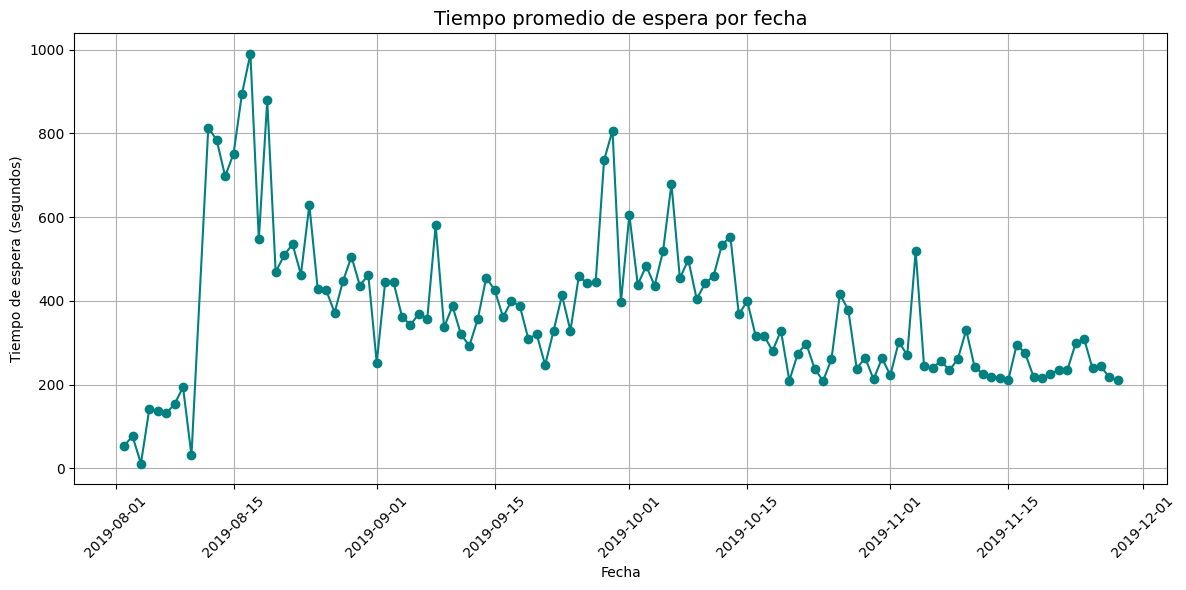

In [24]:

wait_time_by_date = df_operator.groupby("date")["wait_time"].mean().round(2)
plt.figure(figsize=(12, 6))
wait_time_by_date.plot(kind="line", marker="o", color="teal")
plt.title("Tiempo promedio de espera por fecha", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Tiempo de espera (segundos)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


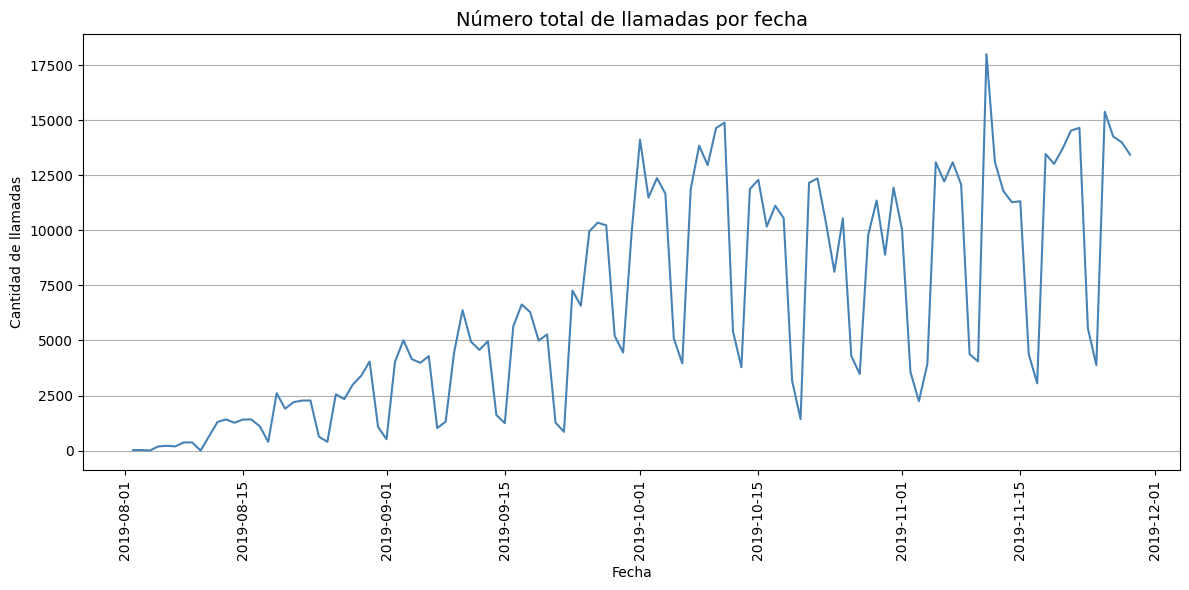

In [25]:
calls_by_date = df_operator.groupby("date")["calls_count"].sum()

plt.figure(figsize=(12, 6))
calls_by_date.plot(kind="line", color="steelblue")
plt.title("Número total de llamadas por fecha", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Cantidad de llamadas")
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


Se puede tomar como fecha de partida para el analisis el 1 de septiembre ya que parecen nivelarse las variaciones un poco a partir de esta fecha

In [26]:

df_operator_filt = df_operator[df_operator["date"] > datetime.date(2019, 9, 1)]
metrics = df_operator_filt.groupby('operator_id').agg({
    'calls_count': 'sum',
    'call_duration': 'mean',
    'wait_time': 'mean',
    'is_missed_call': 'mean'
}).rename(columns={'is_missed_call': 'missed_call_rate'})
# Se sacan los valores promediop para cada operador despues de la fecha establecida


In [27]:
unir = calls_by_operator[["%in", "%out"]]
metrics = metrics.merge(unir, how="left", on="operator_id")


In [28]:
unir = calls_missed_operator["%True"]
metrics = metrics.merge(unir, how="left", on="operator_id")


In [29]:
metrics

,calls_count,call_duration,wait_time,missed_call_rate,%in,%out,%True
operator_id,,,,,,,
879896,197,295.881356,37.627119,0.423729,5.31,94.69,22.55
879898,6168,968.020513,482.589744,0.394872,1.48,98.52,32.53
880020,21,93.230769,6.615385,0.230769,14.81,85.19,55.56
880022,198,241.588235,62.720588,0.411765,3.65,96.35,53.88
880026,1940,828.503185,126.210191,0.484076,1.03,98.97,28.54
...,...,...,...,...,...,...,...
972410,77,944.250000,374.500000,0.500000,0.00,100.00,48.05
972412,61,699.600000,210.000000,0.400000,1.64,98.36,40.98
972460,70,257.888889,89.000000,0.333333,2.86,97.14,40.00


### Visualizaciones y graficos

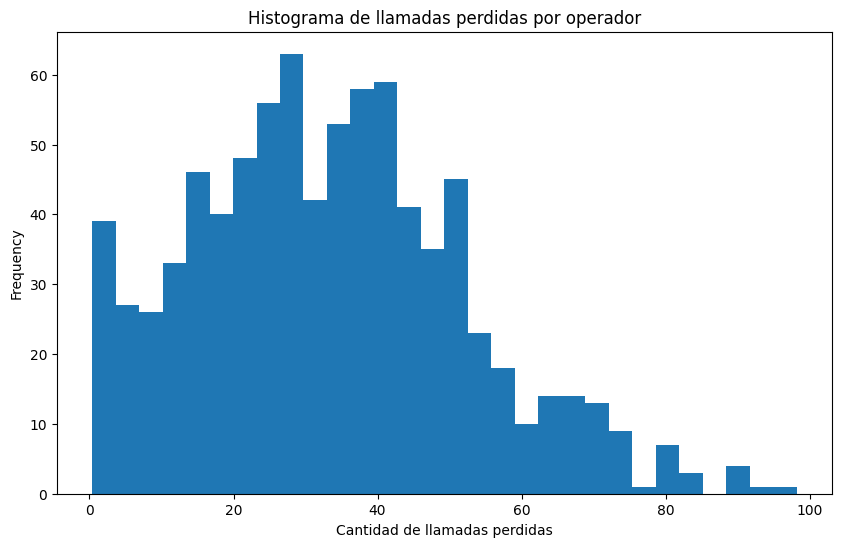

In [30]:
plt.figure(figsize=(10,6))
metrics["%True"].plot(kind='hist', bins=30, title='Histograma de llamadas perdidas por operador')
plt.xlabel('Cantidad de llamadas perdidas')
plt.show()


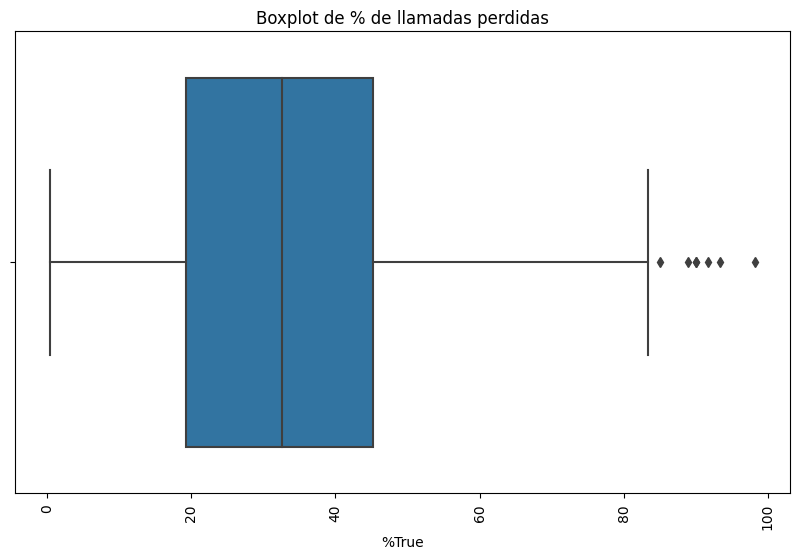

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x=metrics["%True"])
plt.xticks(rotation=90)
plt.title('Boxplot de % de llamadas perdidas')
plt.show()


Se encontro que aquellos operadores que tienen un porcentaje de llamadas perdidas por encima del 83%, son atipicos, por lo cual se retiraran para el analisis.

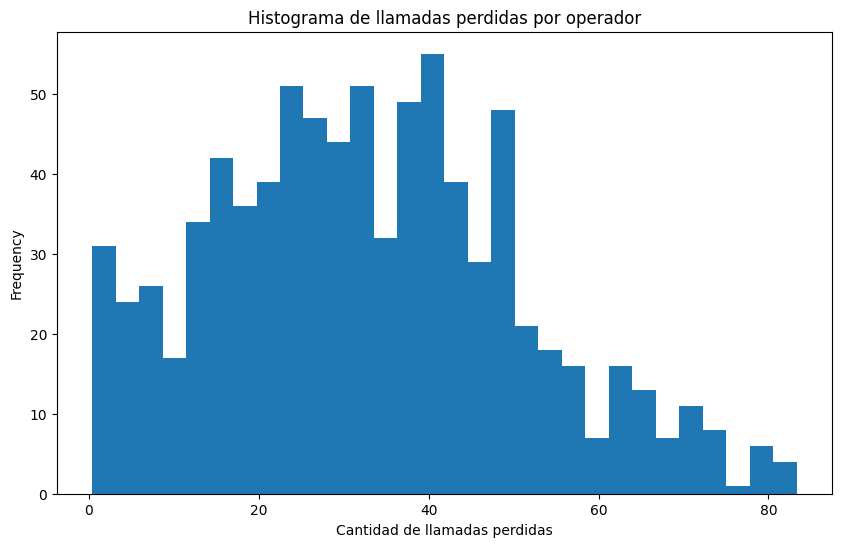

In [32]:
metrics = metrics[metrics["%True"]< 84]
plt.figure(figsize=(10,6))
metrics["%True"].plot(kind='hist', bins=30, title='Histograma de llamadas perdidas por operador')
plt.xlabel('Cantidad de llamadas perdidas')
plt.show()

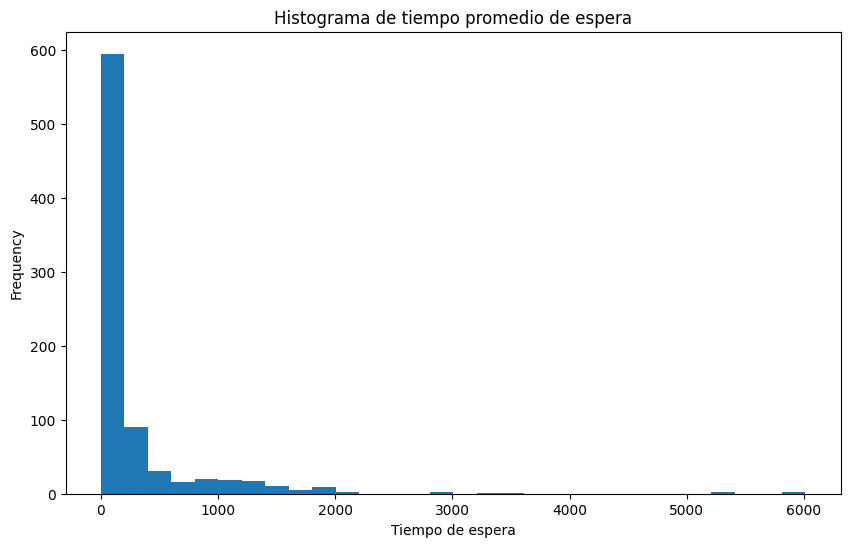

In [33]:
plt.figure(figsize=(10,6))
metrics["wait_time"].plot(kind='hist', bins=30, title='Histograma de tiempo promedio de espera')
plt.xlabel('Tiempo de espera')
plt.show()


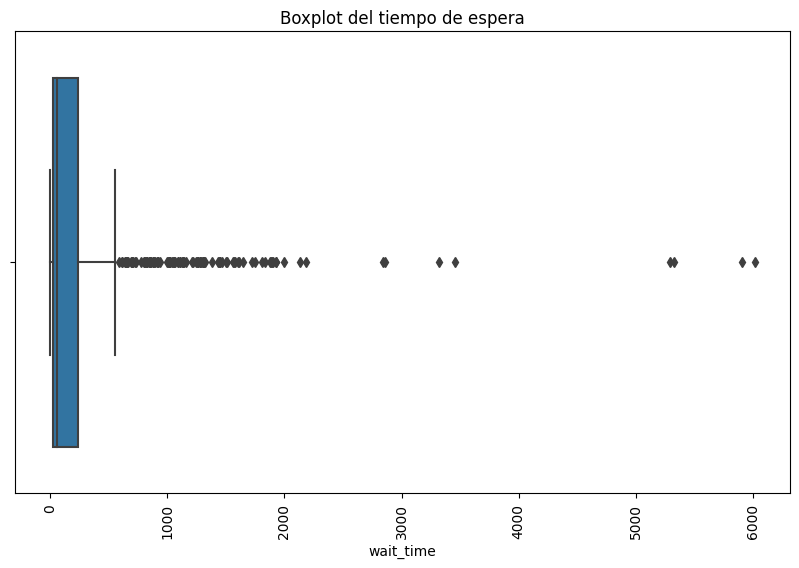

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x=metrics["wait_time"])
plt.xticks(rotation=90)
plt.title('Boxplot del tiempo de espera')
plt.show()


In [35]:
metrics["wait_time"].describe()

count     822.000000
mean      275.982905
std       577.230701
min         0.000000
25%        29.100962
50%        63.050000
75%       241.789751
max      6012.637255
Name: wait_time, dtype: float64

In [36]:
Q1 = metrics["wait_time"].quantile(0.25)
Q3 = metrics["wait_time"].quantile(0.75)
IQR = Q3 - Q1
normal = df_operator[
    (df_operator["wait_time"] >= Q1 - 1.5 * IQR) &
    (df_operator["wait_time"] <= Q3 + 1.5 * IQR)] # Se filtran solo los valores normales de la muetra
normal["wait_time"].max()

560

Se tiene como limte para los valores normales en tiempo de espera un maximo de 560, por lo que se eliminaran todos los registros que esten por encima de este numero 

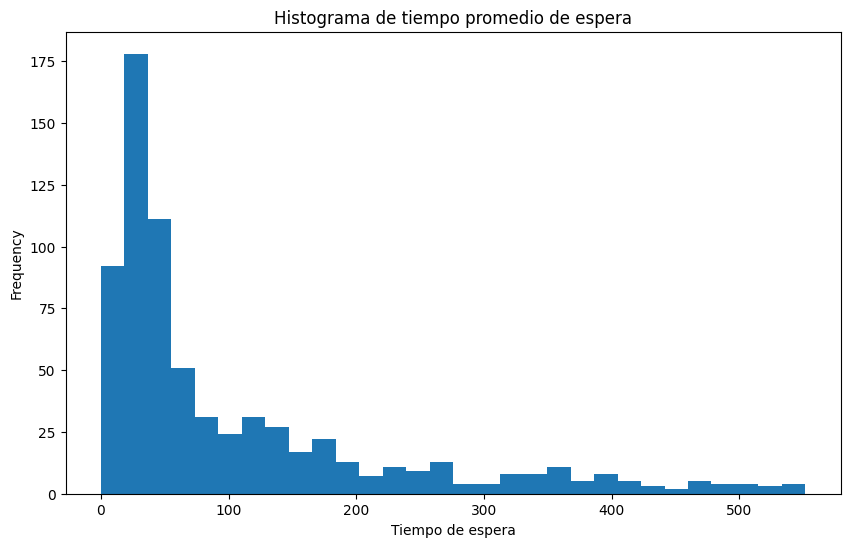

In [37]:
metrics = metrics[metrics["wait_time"]<= 560]
plt.figure(figsize=(10,6))
metrics["wait_time"].plot(kind='hist', bins=30, title='Histograma de tiempo promedio de espera')
plt.xlabel('Tiempo de espera')
plt.show()



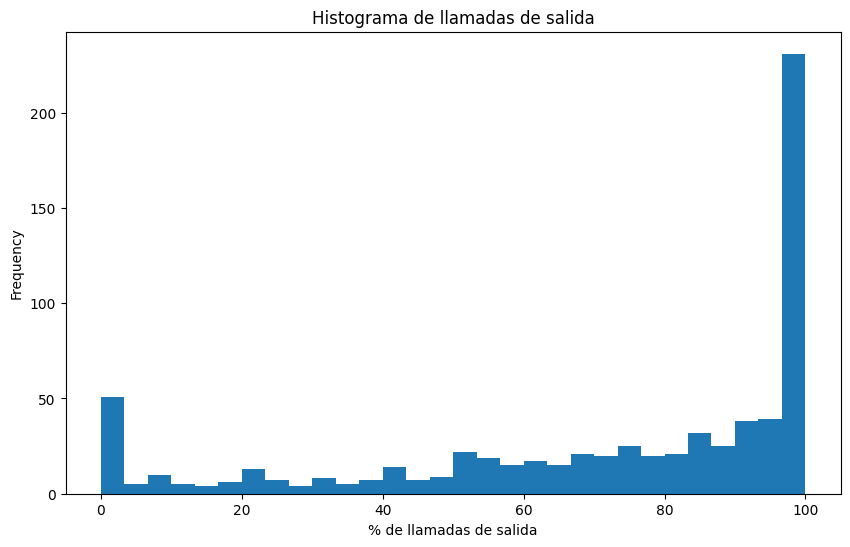

In [38]:
plt.figure(figsize=(10,6))
metrics["%out"].plot(kind='hist', bins=30, title='Histograma de llamadas de salida')
plt.xlabel('% de llamadas de salida')
plt.show()


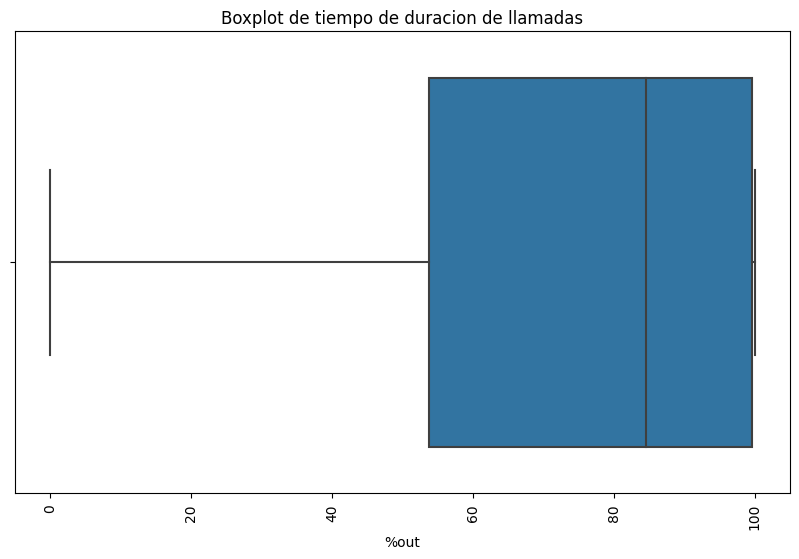

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(x=metrics["%out"])
plt.xticks(rotation=90)
plt.title('Boxplot de tiempo de duracion de llamadas')
plt.show()


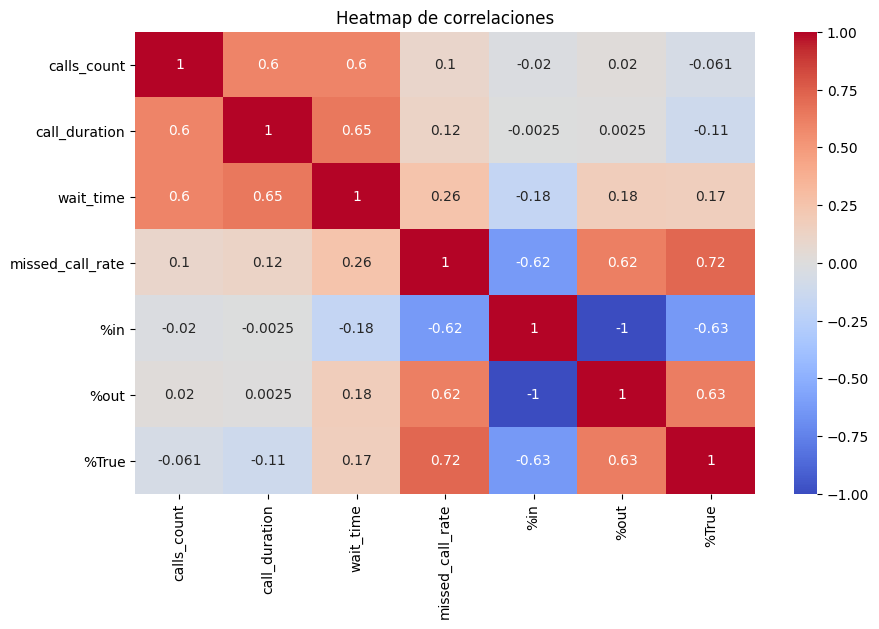

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(metrics.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de correlaciones')
plt.show()


## Identificación de Operadores Ineficaces

### Metricas por operador / % llamadas perdidas

In [41]:
metrics 

,calls_count,call_duration,wait_time,missed_call_rate,%in,%out,%True
operator_id,,,,,,,
879896,197,295.881356,37.627119,0.423729,5.31,94.69,22.55
879898,6168,968.020513,482.589744,0.394872,1.48,98.52,32.53
880020,21,93.230769,6.615385,0.230769,14.81,85.19,55.56
880022,198,241.588235,62.720588,0.411765,3.65,96.35,53.88
880026,1940,828.503185,126.210191,0.484076,1.03,98.97,28.54
...,...,...,...,...,...,...,...
972408,8,66.666667,25.000000,0.666667,0.00,100.00,50.00
972410,77,944.250000,374.500000,0.500000,0.00,100.00,48.05
972412,61,699.600000,210.000000,0.400000,1.64,98.36,40.98


In [42]:
metrics["%True"].describe() 

count    715.000000
mean      31.016392
std       18.094327
min        0.370000
25%       17.535000
50%       29.030000
75%       41.315000
max       83.330000
Name: %True, dtype: float64

Aquellos que tengan una tasa de llamadas perdidas que este por encima del 30% se pueden considerar ineficientes

### Metricas por operador / Tiempo de espera


In [43]:
metrics["wait_time"].describe()

count    715.000000
mean     106.404695
std      121.132707
min        0.000000
25%       26.944444
50%       50.000000
75%      138.443319
max      551.674157
Name: wait_time, dtype: float64

Aquellos operadores que tengan un tiempo de espera promedio por encima de los 50 segundos, se pueden considerar ineficientes

### Metricas por operador / % Llamadas salientes

In [44]:
metrics["%in"].describe()

count    715.000000
mean      28.454014
std       31.964074
min        0.000000
25%        0.345000
50%       15.380000
75%       46.260000
max      100.000000
Name: %in, dtype: float64

Aquellos operadores que tengan menos de 85% de sus llamadas salientes, se pueden considerar ineficientes

In [45]:
metrics['inefficiency_1'] = (metrics["%True"] > 40).astype(int) # Se marca como ineficiente 1 si tiene mas de 40% de llamadas perdidas
metrics['inefficiency_2'] = (metrics["wait_time"] > 140).astype(int) # Se marca como ineficiente 2 si su tiempo de espera promedio es de mas de 140 seg.
metrics['inefficiency_3'] = (metrics["%out"] < 55).astype(int) # Se marca como ineficiente 3 si menos del 65% de sus llamadas son de salida

In [46]:
metrics['inefficiency'] = (metrics['inefficiency_3']+metrics['inefficiency_2']+metrics['inefficiency_1'] >=2).astype(int) # Se clasifica como ineficiente a aquellos operadosres que sean ineficientes en dos ambitos 

In [47]:
metrics

,calls_count,call_duration,wait_time,missed_call_rate,%in,%out,%True,inefficiency_1,inefficiency_2,inefficiency_3,inefficiency
operator_id,,,,,,,,,,,
879896,197,295.881356,37.627119,0.423729,5.31,94.69,22.55,0,0,0,0
879898,6168,968.020513,482.589744,0.394872,1.48,98.52,32.53,0,1,0,0
880020,21,93.230769,6.615385,0.230769,14.81,85.19,55.56,1,0,0,0
880022,198,241.588235,62.720588,0.411765,3.65,96.35,53.88,1,0,0,0
880026,1940,828.503185,126.210191,0.484076,1.03,98.97,28.54,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
972408,8,66.666667,25.000000,0.666667,0.00,100.00,50.00,1,0,0,0
972410,77,944.250000,374.500000,0.500000,0.00,100.00,48.05,1,1,0,1
972412,61,699.600000,210.000000,0.400000,1.64,98.36,40.98,1,1,0,1


In [48]:
ineficientes = metrics[metrics["inefficiency"] == 1]
ineficientes

,calls_count,call_duration,wait_time,missed_call_rate,%in,%out,%True,inefficiency_1,inefficiency_2,inefficiency_3,inefficiency
operator_id,,,,,,,,,,,
884478,1025,339.456522,379.913043,0.521739,1.06,98.94,49.98,1,1,0,1
884946,1275,398.457143,372.685714,0.442857,0.59,99.41,41.33,1,1,0,1
890226,3,20.333333,38.666667,0.333333,57.14,42.86,42.86,1,0,1,1
894656,3050,844.408163,200.986395,0.448980,0.59,99.41,40.05,1,1,0,1
896384,30,866.000000,167.750000,0.250000,0.00,100.00,43.33,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
960296,203,618.583333,205.500000,0.333333,0.99,99.01,50.74,1,1,0,1
969272,466,529.588235,185.558824,0.411765,48.28,51.72,21.89,0,1,1,1
970240,2,10.000000,26.500000,0.500000,50.00,50.00,50.00,1,0,1,1


In [49]:
eficientes = metrics[metrics["inefficiency"] == 0]
eficientes

,calls_count,call_duration,wait_time,missed_call_rate,%in,%out,%True,inefficiency_1,inefficiency_2,inefficiency_3,inefficiency
operator_id,,,,,,,,,,,
879896,197,295.881356,37.627119,0.423729,5.31,94.69,22.55,0,0,0,0
879898,6168,968.020513,482.589744,0.394872,1.48,98.52,32.53,0,1,0,0
880020,21,93.230769,6.615385,0.230769,14.81,85.19,55.56,1,0,0,0
880022,198,241.588235,62.720588,0.411765,3.65,96.35,53.88,1,0,0,0
880026,1940,828.503185,126.210191,0.484076,1.03,98.97,28.54,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
970484,7,25.000000,14.000000,0.666667,0.00,100.00,71.43,1,0,0,0
970486,6,75.000000,14.000000,0.500000,0.00,100.00,33.33,0,0,0,0
972408,8,66.666667,25.000000,0.666667,0.00,100.00,50.00,1,0,0,0


## Pruebas de Hipótesis

### Pruebas

H1: Los operadores ineficientes tienen mayor tiempo de espera promedio 
- Hipótesis nula (H₀): No hay diferencia en el tiempo de espera entre operadores eficientes e ineficientes.
- Hipótesis alternativa (H₁): Los operadores ineficientes tienen mayor tiempo de espera promedio.


In [50]:
t_stat1, p_val1 = stats.ttest_ind(ineficientes["wait_time"], eficientes["wait_time"],equal_var=False)
print(f"H1 - p-value: {p_val1:.4f}")
if p_val1 < 0.05:
    print("✅ Se rechaza H₀: hay diferencia estadisticamente significativa en el tiempo promedio de espera.")
else:
    print("❌ No se rechaza H₀: no hay evidencia suficiente de una diferencia estadisticamente significativa.")


H1 - p-value: 0.0000
✅ Se rechaza H₀: hay diferencia estadisticamente significativa en el tiempo promedio de espera.


H2: La tasa de llamadas perdidas es mayor en operadores ineficientes
- Hipótesis nula (H₀): No hay diferencia en la tasa de llamadas perdidas entre ambos grupos.
- Hipótesis alternativa (H₁): Los operadores ineficientes tienen una tasa de llamadas perdidas mayor.


In [51]:
t_stat2, p_val2 = stats.ttest_ind(ineficientes["missed_call_rate"], eficientes["missed_call_rate"])
print(f"H2 - p-value: {p_val2:.4f}")
if p_val2 < 0.05:
    print("✅ Se rechaza H₀: Existe una diferencia significativa en la tasa de llamadas perdidas entre operadores ineficientes y eficientes.")
else:
    print("❌ No hay evidencia suficiente para afirmar que la tasa de llamadas perdidas difiere entre los grupos.")

H2 - p-value: 0.0000
✅ Se rechaza H₀: Existe una diferencia significativa en la tasa de llamadas perdidas entre operadores ineficientes y eficientes.


### Validaciones

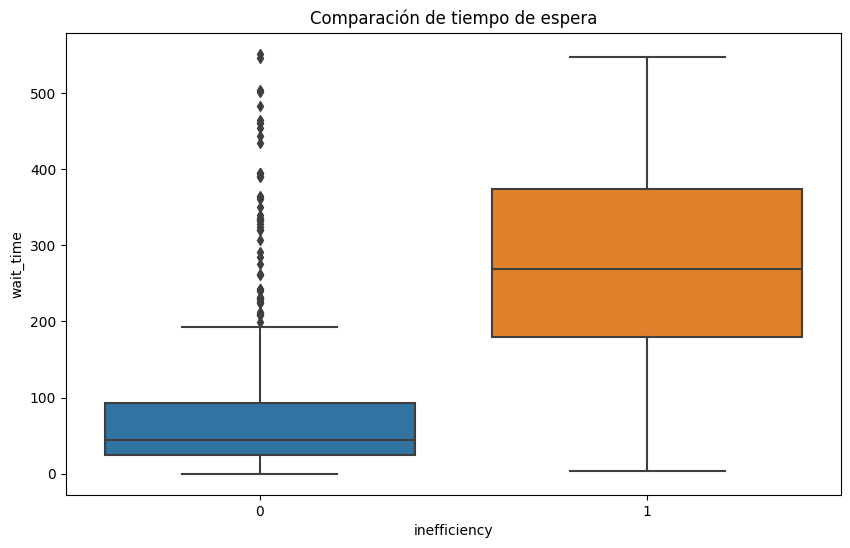

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(x='inefficiency', y='wait_time', data=metrics)
plt.title('Comparación de tiempo de espera')
plt.show()


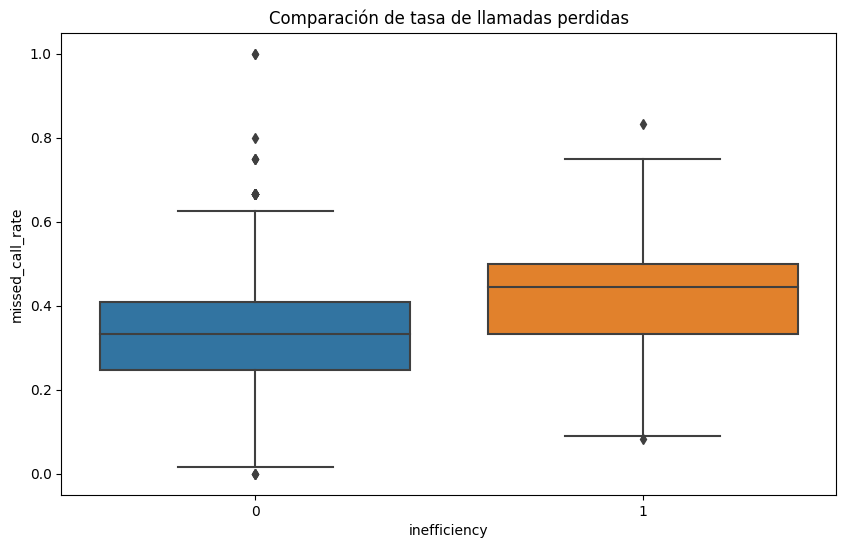

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(x='inefficiency', y='missed_call_rate', data=metrics)
plt.title('Comparación de tasa de llamadas perdidas')
plt.show()


## Resultados y Conclusiones

Este es un buen puntoi de partida para ir conociendo el rendimiento de los operadores, pero al ser el primer analisis solo se puede jusgar el rendimiento de estos atrabes de el rendimiento de sus compañeros, por lo que se clasifico como ineficientes a aquellos que se encuentran por encima del 75%. para un futuro se puede ir afinando el criterio y establecerlo como un numero fijo y un un porcentaje del grupo de estudio.

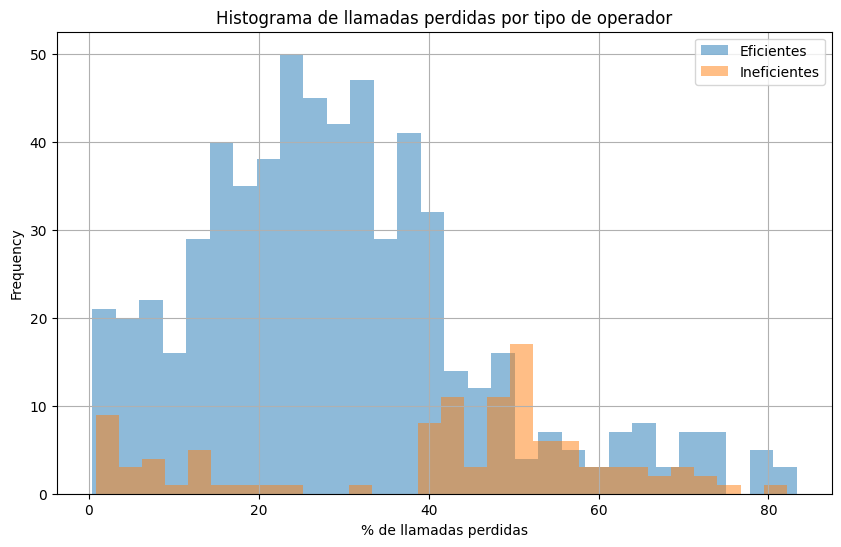

In [54]:
plt.figure(figsize=(10,6))
eficientes["%True"].plot(kind='hist', bins=30, alpha= .5, label='Eficientes')
ineficientes["%True"].plot(kind='hist', bins=30, alpha= .5, label='Ineficientes')
plt.xlabel('% de llamadas perdidas')
plt.title('Histograma de llamadas perdidas por tipo de operador')
plt.legend()
plt.grid(True)
plt.show()

El comportamiento en cuanto al % de llamadas perdidas entre operadores eficientes e ineficientes refleja que muy pocos de los ineficientes tiene menos del 40% de llamadas perdidas, aunque puede haber operadores eficientes que tengan mas del 40% de llamadas perdidas.

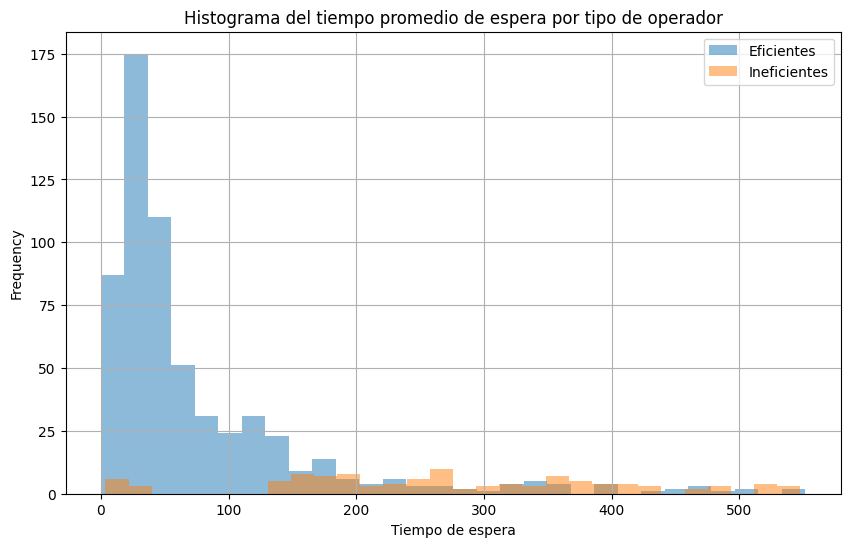

In [55]:
plt.figure(figsize=(10,6))
eficientes["wait_time"].plot(kind='hist', bins=30, alpha= .5, label='Eficientes')
ineficientes["wait_time"].plot(kind='hist', bins=30, alpha= .5, label='Ineficientes')
plt.xlabel('Tiempo de espera')
plt.title('Histograma del tiempo promedio de espera por tipo de operador')
plt.legend()
plt.grid(True)
plt.show()

Se ve una diferencia clara en donde mas del 50% d elos operadores eficientes tienen tiempos de espera menores a los 100 seg, mientras que los operadores ineficientes casi todos estan por encima de este numero.

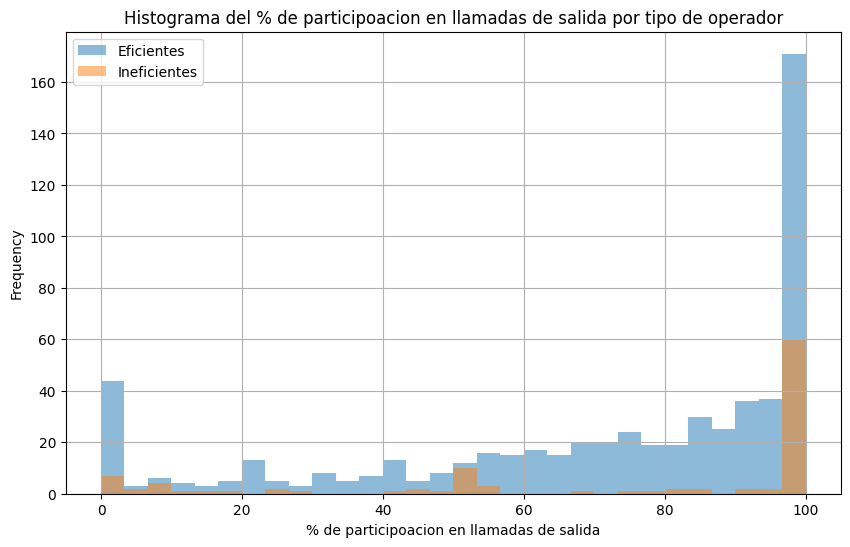

In [59]:
plt.figure(figsize=(10,6))
eficientes["%out"].plot(kind='hist', bins=30, alpha= .5, label='Eficientes')
ineficientes["%out"].plot(kind='hist', bins=30, alpha= .5, label='Ineficientes')
plt.xlabel('% de participoacion en llamadas de salida')
plt.title('Histograma del % de participoacion en llamadas de salida por tipo de operador')
plt.legend()
plt.grid(True)
plt.show()

Los operadores eficientes muestran una mayor participacion en llamadas de salida, mientras que los operadores ineficientes muiestran una participacion mas aleatoria